# Retaining Customers_copy

Data reading and discovering

Data Exploration to choose the impact features 

Prediction Model

Model features

The steps are: 

Selecting the Customers 

In [110]:
import pandas as pd
from sklearn.cluster import KMeans

In [224]:
df=pd.read_excel(r'C:\Users\r.alghamdi\Desktop\try.xlsx')

In [225]:
df.columns

Index(['customer_name', 'purchase_date', 'billing', 'created_date'], dtype='object')

In [226]:
df

,customer_name,purchase_date,billing,created_date
0,a,16-11-2022,4,16-11-2022
1,b,15-11-2022,5,15-11-2022
2,c,13-11-2022,3,14-11-2022
3,a,18-11-2022,5,2022-01-11 00:00:00
4,b,2022-10-11 00:00:00,6,15-11-2022


In [227]:
df['purchase_date']=df['purchase_date'].astype(str)

In [228]:
#the last active time of the user 

last_active_time = df.groupby(['customer_name'])['purchase_date'].max().reset_index()

df['purchase_date'] = df['purchase_date'].apply(pd.to_datetime).dt.date

last_active_time['last_active_time']=(df['purchase_date'].max() - df['purchase_date']).dt.days#.reset_index()#.rename()
last_active_time


C:\Users\r.alghamdi\Anaconda3\lib\site-packages\pandas\core\apply.py:1137: UserWarning: Parsing '16-11-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  mapped = lib.map_infer(
C:\Users\r.alghamdi\Anaconda3\lib\site-packages\pandas\core\apply.py:1137: UserWarning: Parsing '15-11-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  mapped = lib.map_infer(
C:\Users\r.alghamdi\Anaconda3\lib\site-packages\pandas\core\apply.py:1137: UserWarning: Parsing '13-11-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  mapped = lib.map_infer(
C:\Users\r.alghamdi\Anaconda3\lib\site-packages\pandas\core\apply.py:1137: UserWarning: Parsing '18-11-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  mapped = lib.map_infer(


,customer_name,purchase_date,last_active_time
0,a,18-11-2022,2
1,b,2022-10-11 00:00:00,3
2,c,13-11-2022,5


In [229]:
#account length (age) of the user

account_lenght = df.groupby(['customer_name'])['purchase_date'].max().reset_index()

df['purchase_date'] = df['purchase_date'].apply(pd.to_datetime)
df['created_date'] = df['created_date'].apply(pd.to_datetime)

account_lenght['age']=(df['purchase_date'].max() - df['created_date']).dt.days#.reset_index()#.rename()
account_lenght

C:\Users\r.alghamdi\Anaconda3\lib\site-packages\pandas\core\apply.py:1137: UserWarning: Parsing '16-11-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  mapped = lib.map_infer(
C:\Users\r.alghamdi\Anaconda3\lib\site-packages\pandas\core\apply.py:1137: UserWarning: Parsing '15-11-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  mapped = lib.map_infer(
C:\Users\r.alghamdi\Anaconda3\lib\site-packages\pandas\core\apply.py:1137: UserWarning: Parsing '14-11-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  mapped = lib.map_infer(


,customer_name,purchase_date,age
0,a,2022-11-18,2
1,b,2022-11-15,3
2,c,2022-11-13,4


In [230]:
#the frequency of purchasing

frequency =df.copy()

frequency.set_index('purchase_date', inplace=True)
frequency.index = pd.DatetimeIndex(frequency.index)

frequency = frequency.groupby(['customer_name',pd.Grouper(freq="M", level='purchase_date')]).count()
frequency

billing  created_date
customer_name purchase_date                       
a             2022-11-30           2             2
b             2022-10-31           1             1
              2022-11-30           1             1
c             2022-11-30           1             1

In [231]:
# the total amout of billing 

value = df.copy()
value.set_index('purchase_date', inplace=True)
value.index = pd.DatetimeIndex(value.index)
value

value = value.groupby('customer_name')['billing'].mean().reset_index().rename(columns={'billing':'billing_mean'})
value

,customer_name,billing_mean
0,a,4.5
1,b,5.5
2,c,3.0


#merging the dataframe

In [232]:
df1=last_active_time.merge(frequency, on='customer_name',how='outer')#.merge(on='customer_name').merge(value, on='customer_name',how='outer')
df1

,customer_name,purchase_date,last_active_time,billing,created_date
0,a,18-11-2022,2,2,2
1,b,2022-10-11 00:00:00,3,1,1
2,b,2022-10-11 00:00:00,3,1,1
3,c,13-11-2022,5,1,1


In [233]:
df_f=df1.merge(value, on='customer_name',how='outer')
df_f=df_f.rename(columns={'billing':'frequency'})
df_f

,customer_name,purchase_date,last_active_time,frequency,created_date,billing_mean
0,a,18-11-2022,2,2,2,4.5
1,b,2022-10-11 00:00:00,3,1,1,5.5
2,b,2022-10-11 00:00:00,3,1,1,5.5
3,c,13-11-2022,5,1,1,3.0


In [234]:
df_f=df_f.drop(columns='purchase_date')

In [235]:
df3=df_f.merge(account_lenght, on='customer_name',how='outer')#.merge(on='customer_name').merge(value, on='customer_name',how='outer')
df3

,customer_name,last_active_time,frequency,created_date,billing_mean,purchase_date,age
0,a,2,2,2,4.5,2022-11-18,2
1,b,3,1,1,5.5,2022-11-15,3
2,b,3,1,1,5.5,2022-11-15,3
3,c,5,1,1,3.0,2022-11-13,4


In [236]:
df3.columns

Index(['customer_name', 'last_active_time', 'frequency', 'created_date',
       'billing_mean', 'purchase_date', 'age'],
      dtype='object')

In [237]:
type(df3['customer_name'])#.unique()

pandas.core.series.Series

In [238]:
df3['customer_name_1']= df3['customer_name'].astype('category').cat.codes
df3['customer_name_1'].unique()

array([0, 1, 2], dtype=int8)

In [239]:
df3=df3.drop(columns=['customer_name','customer_name_1','created_date','purchase_date'])

In [240]:
df3

,last_active_time,frequency,billing_mean,age
0,2,2,4.5,2
1,3,1,5.5,3
2,3,1,5.5,3
3,5,1,3.0,4


First approach

In [241]:
kmeans = KMeans(n_clusters=4)  # you can change the number of clusters basd on your data 
data=kmeans.fit(df3)
df3['class']=data.labels_

C:\Users\r.alghamdi\AppData\Local\Temp\ipykernel_11992\2982779397.py:2: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  data=kmeans.fit(df3)


In [242]:
import numpy as np
y =([2, 0, 0, 1])
y

[2, 0, 0, 1]

In [243]:
df3

,last_active_time,frequency,billing_mean,age,class
0,2,2,4.5,2,2
1,3,1,5.5,3,0
2,3,1,5.5,3,0
3,5,1,3.0,4,1


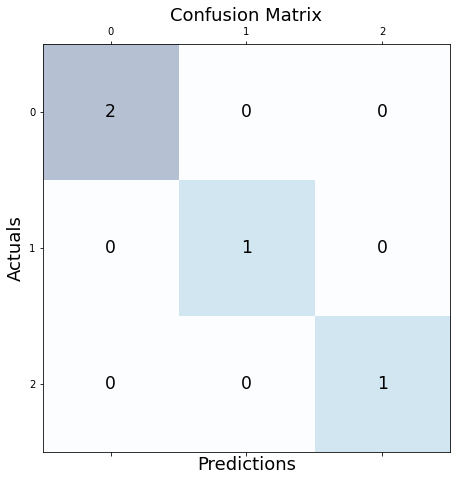

In [244]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

conf_matrix=confusion_matrix(y, data.labels_) 

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', 
                ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Second Approach

In [245]:
import pandas as pd 
import numpy as np
# import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import mutual_info_classif

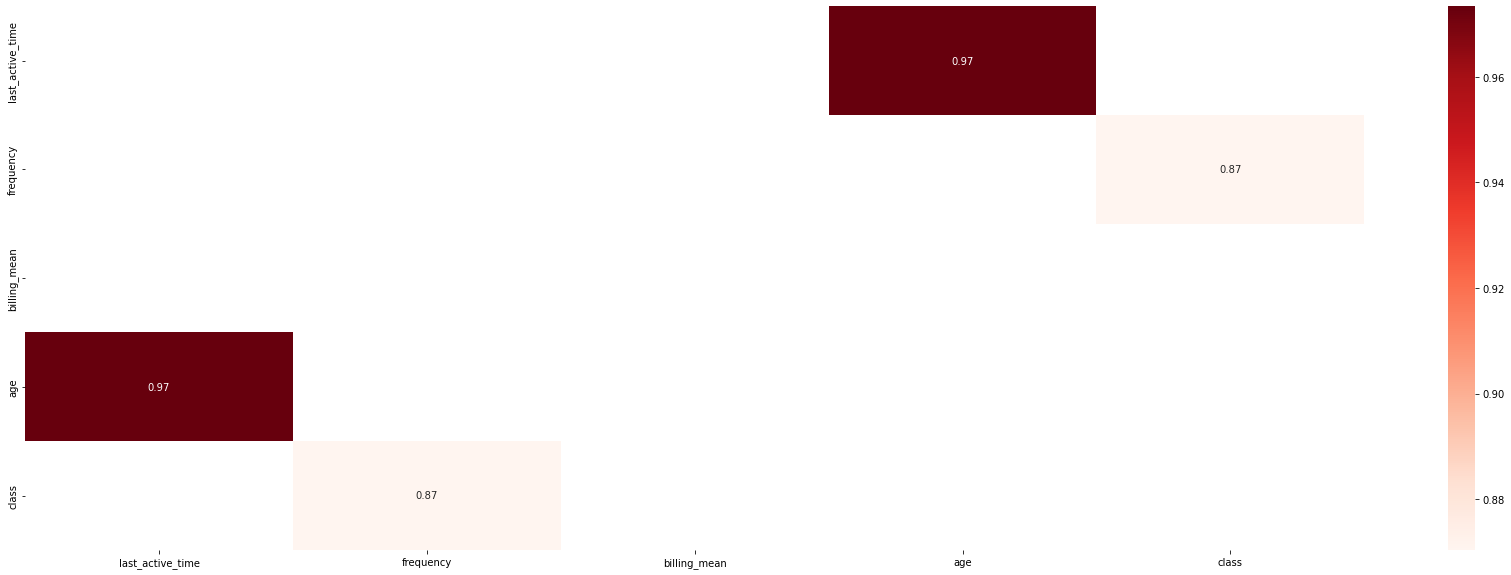

In [246]:
dfCorr = df3.corr()
filteredDf = dfCorr[((dfCorr >= .7) & (dfCorr != 1)) ]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

[0.406      0.22733333 0.36666667]


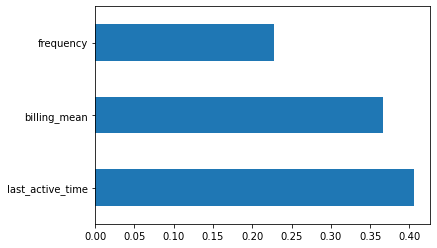

<Figure size 5760x6480 with 0 Axes>

In [249]:
X = df3.iloc[:,0:3]  #independent columns
y = df3.iloc[:,-1]    #target column 
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
#plot graph of feature importances 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(24).plot(kind='barh')
plt.figure(figsize=(80,90))
plt.show()

In [250]:
#splitting the data (to use it on the building the model)
y=df3['class']
x=df3.drop('class',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [255]:
y_train

2    0
0    2
Name: class, dtype: int32

In [256]:
y_test

1    0
3    1
Name: class, dtype: int32

In [251]:
model = GradientBoostingClassifier(n_estimators=10)
model.fit(x_train, y_train)
train_pred = model.predict(x_train)
print('train',train_pred)     
y_pred = model.predict(x_test)
print('test',y_pred)

train [0 2]
test [0 0]


In [259]:
from sklearn.metrics import accuracy_score

(accuracy_score(y_test, y_pred))*100

50.0


Text(91.68, 0.5, 'predicted label')

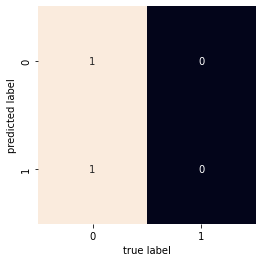

In [252]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')